In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from urllib import request
import numpy as np
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from keras.layers import Rescaling

from tqdm import tqdm


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


from keras import Sequential
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense, Flatten, Dropout

from tensorflow.keras.optimizers import Adam

from keras.losses import CategoricalCrossentropy
import pandas as pd

def understanding_error(history):
    
    result = list()
    history = pd.DataFrame(history.history)
    
    train_accuracy = history["accuracy"][-1:].values
    test_accuracy = history["val_accuracy"][-1:].values
    
    if (test_accuracy < 0.80) :
        result.append("High Biais")
        result.append("Underfitting")
    
    elif (test_accuracy > 0.80 and test_accuracy < 0.95):
        result.append("Medium Biais")
        
    elif (test_accuracy > 0.95):
        result.append("Low Biais")
    
    gap = train_accuracy - test_accuracy
    
    if (gap > 0.15):
        result.append("High Variance")
        result.append("Overfitting")
        
    elif (gap < 0.15 and gap > 0.10):
        result.append("Medium Variance")
            
    elif (gap < 0.10 ):
        result.append("Low Variance")
    
    return (result)

def plot_loss_curves(history):

    result = understanding_error(history)
    history = pd.DataFrame(history.history)

    loss = history["loss"]
    accuracy = history["accuracy"]
    val_loss = history["val_loss"]
    val_accuracy = history["val_accuracy"]
    epochs = range(len(loss))

    print(result)
    ### plot loss and accuracy of training
    plt.figure()
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="validation_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show();

    ### plot loss and accuracy of validation
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="validation_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show();
    
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def calculate_average_metrics(y_true,
                              y_pred):
  
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true,
                                                                     y_pred,
                                                                     average="weighted")
    
    result = {
               'Accuracy': round(accuracy * 100, 2),
               'Precision' : round(precision * 100, 2),
               'Recall': round(recall * 100, 2),
               'F1-Score' : round(f1_score * 100, 2)
        
             }
    
    return (result)

def visualize_average_metrics(scores : dict):

    # Unpack Data 
    names = list(scores.keys())
    values = list(scores.values())

    # Create figure
    fig = plt.figure(figsize=(10, 5))

    # Create bar chart
    plt.bar(names, values, width=0.4)
    plt.ylim(0, 110)  # set y-axis limit

    # Add percentage labels above each bar
    for i in range(len(values)):

        place_x_axis = i-0.3
        place_y_axis = values[i]+2
        text = str(values[i])+'%'

        plt.text(x=place_x_axis,
                y=place_y_axis,
                s=text,
                fontsize=12)

    plt.xlabel('Metrics')
    plt.ylabel('Scores (%)')
    plt.title('Bar Chart of Scores')
    plt.show()
    
import random

def plot_random_img(data, labels, class_names, number):

    plt.figure(figsize=(10, 10))
    for i in range(number):

        ax = plt.subplot(int(number/2), int(number/2), i+1)
        index = random.choice(range(len(data)))
        plt.imshow(data[index], cmap=plt.cm.binary)
        plt.title(class_names[int(labels[index])])
        plt.axis(False)

In [2]:
# X_train = np.load("saving/810k_train_set.npy", )
# y_train = np.load("saving/810k_train_labels.npy", )
# X_val = np.load("saving/90k_val_set.npy")
# y_val = np.load("saving/90k_val_labels.npy")
# X_test = np.load("saving/100k_test_set.npy")
# y_test = np.load("saving/100k_test_labels.npy")



In [3]:

# print("X_train shape: {}".format(X_train.shape))
# print("y_train shape: {}".format(y_train.shape))
# print("X_dev shape: {}".format(X_val.shape))
# print("y_dev shape: {}".format(y_val.shape))
# print("X_test shape: {}".format(X_test.shape))
# print("y_test shape: {}".format(y_test.shape))

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-02-05 17:44:41.473044: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 17:44:41.572461: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-05 17:44:41.572842: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [6]:
import subprocess as sp
import os
import tensorflow as tf
import numpy as np

def get_gpu_memory():
    command = "nvidia-smi --query-gpu=memory.free --format=csv"
    memory_free_info = sp.check_output(command.split()).decode('ascii').split('\n')[:-1][1:]
    memory_free_values = [int(x.split()[0]) for i, x in enumerate(memory_free_info)]
    print(f"{memory_free_values[0] / 1000} Gb")

get_gpu_memory()
print(tf.config.experimental.get_memory_info('GPU:0'))
print(tf.config.experimental.get_memory_usage('GPU:0'))

5.651 Gb
{'current': 0, 'peak': 0}
0


In [7]:
# import numpy as np
# train_set = np.load("saving/810k_train_set.npy")
# y_train = np.load("saving/810k_train_labels.npy")
# val_set = np.load("saving/90k_val_set.npy")
# y_val = np.load("saving/90k_val_labels.npy")


In [8]:
my_file = open("saving/class_names.txt", "r")
data = my_file.read()
class_names = data.split("\n")
my_file.close()

NBR_CLASS = len(class_names)

NBR_CLASS

100

In [9]:
train_dataset = tf.data.experimental.load("saving/810k_tensorflow_train_dataset")
val_dataset = tf.data.experimental.load("saving/90k_tensorflow_val_dataset")


train_dataset

<_LoadDataset shapes: ((28, 28, 1), (100,)), types: (tf.float32, tf.float32)>

In [10]:
import tensorflow as tf

def batch_prefetch_dataset_convertion(dataset, batch_size=256):

    batch_dataset = dataset.batch(batch_size=batch_size)
    prefetch_dataset = batch_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return (batch_dataset)

train_dataset = batch_prefetch_dataset_convertion(train_dataset, batch_size=256)
val_dataset = batch_prefetch_dataset_convertion(val_dataset, batch_size=256)

In [11]:
from keras.models import load_model

model = load_model("best_model_train_on_900k")
model.evaluate(val_dataset)

352/352 [==============================] - 4s 12ms/step - loss: 0.6266 - accuracy: 0.8404


[0.6265830993652344, 0.8404111266136169]

In [15]:
import cv2
from PIL import Image
from PIL.Image import fromarray

IMG_PATH = "book.png"

def load_img_array(img_path):

    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_pil = fromarray(img_array)
    img_resize = img_pil.resize((28, 28), Image.ANTIALIAS)
    img = np.array(img_resize)
    img = tf.expand_dims(img, axis=2)
    img = tf.expand_dims(img, axis=0)
    print("IMG SHAPE", img.shape)
    return (img)

img = load_img_array(img_path=IMG_PATH)

probs = model.predict(img)

print(probs)

IMG SHAPE (1, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


/tmp/ipykernel_122970/2910746089.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_resize = img_pil.resize((28, 28), Image.ANTIALIAS)


In [11]:
def recover_data_label_from_dataset(dataset : tf.data.Dataset):
    
        label = np.concatenate([label for data, label in dataset], axis=0)
        data = np.concatenate([data for data, label in dataset], axis=0)
        
        return (data, label)


train_data, train_label= recover_data_label_from_dataset(train_dataset)
val_data, val_label = recover_data_label_from_dataset(val_dataset)

In [12]:
get_gpu_memory()

1.535 Gb


### Best accuracy and loss 
- `Model_7`
- **`val_accuracy: 0.8457`**, 
- **`10 epochs`**
- **`900_000 example`**


### Import last best model

In [15]:
from keras.losses import CategoricalCrossentropy

model_7 = Sequential(
    [
        Input(shape=(28, 28, 1)),
        
        Conv2D(64, (3, 3), activation="relu", padding='same'),
        Conv2D(64, (3, 3), activation="relu", padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        
        Conv2D(128, (3, 3), activation="relu", padding='same'),
        Conv2D(128, (3, 3), activation="relu", padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        
        Conv2D(256, (3, 3), activation="relu", padding='same'),
        Conv2D(256, (3, 3), activation="relu", padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        
        Flatten(),
        Dense(1024, activation="relu"),
        Dropout(0.5),
        
        Dense(NBR_CLASS, activation="softmax")
    ]
)

model_7.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=["accuracy"])

model_7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [16]:
history_model_7 = model_7.fit(train_dataset,
                            validation_data=[val_dataset],
                            epochs=10,
                            verbose=1)

Epoch 1/10


2023-02-05 17:47:15.801074: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8600
2023-02-05 17:47:17.348289: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


3165/3165 [==============================] - 122s 37ms/step - loss: 1.1149 - accuracy: 0.7162 - val_loss: 0.7179 - val_accuracy: 0.8132
Epoch 2/10
3165/3165 [==============================] - 116s 37ms/step - loss: 0.7215 - accuracy: 0.8138 - val_loss: 0.6598 - val_accuracy: 0.8291
Epoch 3/10
3163/3165 [============================>.] - ETA: 0s - loss: 0.6407 - accuracy: 0.8331

['Medium Biais', 'Low Variance']


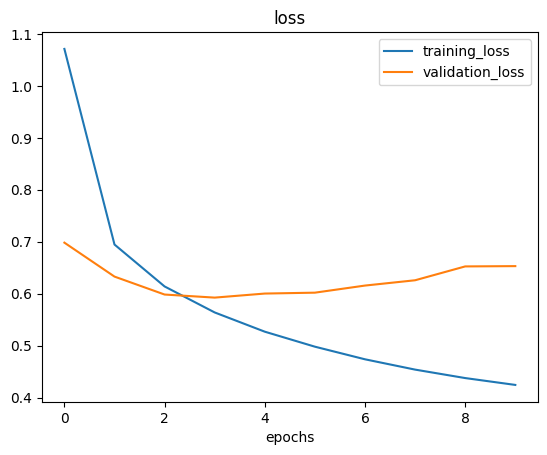

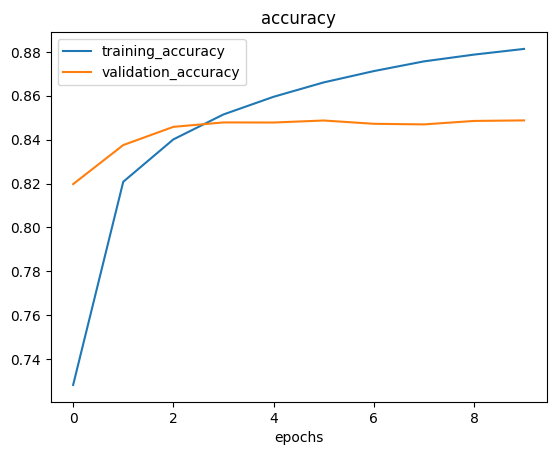

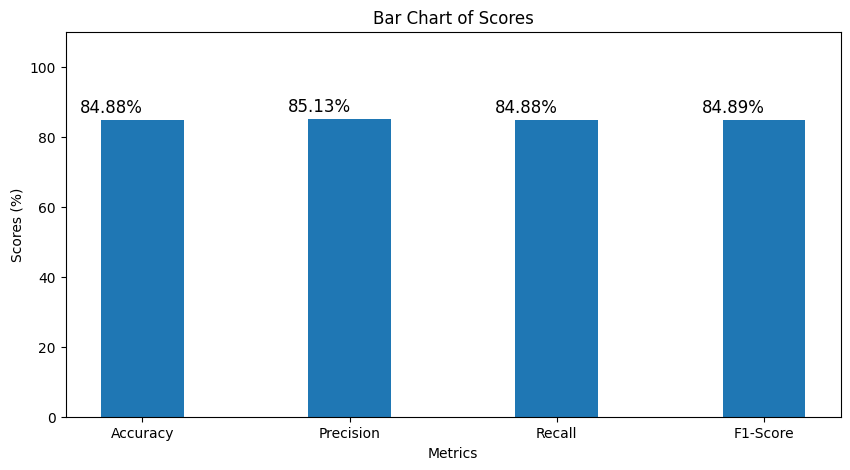

In [23]:
plot_loss_curves(history_model_7)
y_probability = model_7.predict(val_dataset)
y_pred = y_probability.argmax(axis=1)

scores_model_7 = calculate_average_metrics(y_true=val_label.argmax(axis=1),
                                            y_pred=y_pred)
                                   
visualize_average_metrics(scores=scores_model_7)

In [18]:
model_7.save("best_model_train_on_900k")

2023-02-03 16:16:18.371306: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: best_model_train_on_900k/assets


In [36]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Loss on the Test set : {loss}")
print(f"Accuracy on the Test set : {(accuracy*100):.2f}%")

1250/1250 [==============================] - 1s 968us/step - loss: 3.9507 - accuracy: 0.7145
Loss on the Test set : 3.950748920440674
Accuracy on the Test set : 71.45%


In [33]:
model.save("best_model")

2022-12-23 21:04:31.307068: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: best_model/assets


### Test Prediction

In [1]:
from keras.models import load_model
import random

import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import tensorflow as tf

In [ ]:
from keras.models import load_model

model = load_model("best_model")

my_file = open("class_names.txt", "r")
data = my_file.read()
class_names = data.split("\n")
my_file.close()

In [22]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from tensorflow import GradientTape
import numpy as np

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from tensorflow import GradientTape
import cv2
from PIL import Image
from PIL.Image import fromarray

IMG_PATH = "book.png"

def load_img_array(img_path):

    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_pil = fromarray(img_array)
    img_resize = img_pil.resize((28, 28), Image.ANTIALIAS)
    img = np.array(img_resize)
    img = tf.expand_dims(img, axis=2)
    img = tf.expand_dims(img, axis=0)
    print("IMG SHAPE", img.shape)
    return (img)


def find_target_layer(model):

    # attempt to find the final convolutional layer in the network
    # by looping over the layers of the network in reverse order
    for layer in reversed(model.layers):

        # check to see if the layer has a 4D output
        if len(layer.output_shape) == 4:
            return layer.name



class GradCAM:

    def __init__(self, model):

        self.model = model
        self.layerName = find_target_layer(self.model)

    def create_gradcam_model(self):

        # self.model.layers[-1].activation = None

        GradModel = Model(inputs=[self.model.inputs], 
                          outputs=[self.model.get_layer(self.layerName).output, 
                                    self.model.output]) 
        return (GradModel)

    def compute_gradient(self, GradCAM_Model, img_array):
    # Then, we compute the gradient of the top predicted class for our input image
        # with respect to the activations of the last conv layer
        with GradientTape() as tape:
            LastFeatureMap, preds = GradCAM_Model(img_array)
            print(LastFeatureMap.shape, preds.shape)
            pred_index = tf.argmax(preds, axis=0)
            print(pred_index)
            y_pred = preds[:, pred_index]
            print(y_pred)

        # This is the gradient of the output neuron (top predicted or chosen)
        # with regard to the output feature map of the last conv layer
        Grad = tape.gradient(y_pred, LastFeatureMap)

        # This is a vector where each entry is the mean intensity of the gradient
        # over a specific feature map channel
        Grad = tf.reduce_mean(self.Grad, axis=(0, 1, 2))

        return (Grad, LastFeatureMap)
    
    def compute_heatmap(self, Grad, LastFeatureMap):

        # We multiply each channel in the feature map array
        # by "how important this channel is" with regard to the top predicted class
        # then sum all the channels to obtain the heatmap class activation
        LastFeatureMap = LastFeatureMap[0]
        HeatMap = LastFeatureMap @ Grad[..., tf.newaxis]
        HeatMap = tf.squeeze(HeatMap)

        return (HeatMap)

    def normalize_heatmap(self, Heatmap):
        # For visualization purpose, we will also normalize the heatmap between 0 & 1
        Heatmap = tf.maximum(Heatmap, 0) / tf.math.reduce_max(Heatmap)
        return (Heatmap.numpy())
    
    def generate_heatmap(self, filename):
        
        img_array = load_img_array(filename)
        GradModel = self.create_gradcam_model()
        Grad, LastFeatureMap = self.compute_gradient(GradModel, img_array)
        HeatMap = self.compute_heatmap(Grad, LastFeatureMap)
        NormalizedHeatMap = self.normalize_heatmap(HeatMap)

        # # Display heatmap
        plt.matshow(NormalizedHeatMap)
        plt.show()




In [17]:
gradcam = GradCAM(model=model)
gradcam.generate_heatmap(filename=IMG_PATH)

/tmp/ipykernel_122970/2041074077.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_resize = img_pil.resize((28, 28), Image.ANTIALIAS)


IMG SHAPE (1, 28, 28, 1)
(1, 7, 7, 128) (1, 100)
tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(100,), dtype=int64)


TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got <tf.Tensor: shape=(100,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>